In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import random
import math
import pandas as pd

# Discrete Random variable

bernoulli and binomial

In [6]:
# Simulated coin flips
np.random.seed(42)#discuss
random_numbers = np.random.random(size=4)#flipping coin 4 times

random_numbers
# what this array returned as output

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [8]:
heads = random_numbers < 0.5
heads

array([ True, False, False, False])

In [9]:
np.sum(heads)

1

second method

In [12]:
n_of_head = sum([1 for _ in range(10000) if sum(np.random.random(size=4) < 0.5)==4])
#discuss above code working
print("probability of head is :" + str(n_of_head/10000))

probability of head is :0.062


binomial  trail cdf

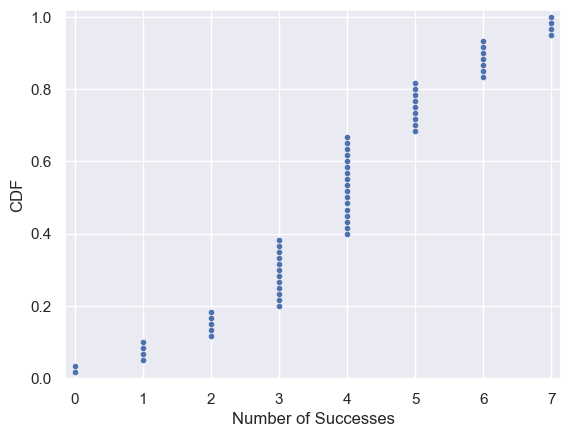

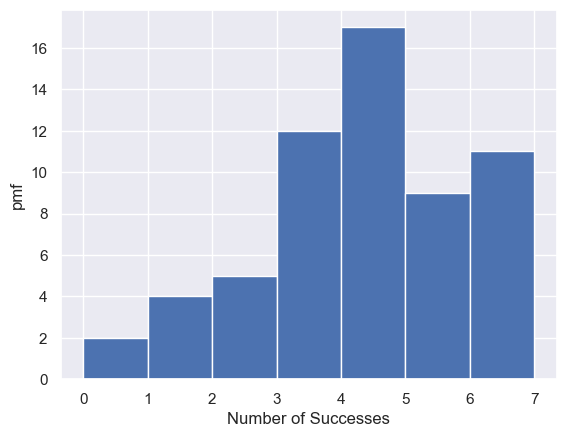

In [27]:
sns.set()
sample = np.random.binomial(10,0.4,size = 60
                           )#taking binomial sample of size = 60
# Calculate CDF
x = np.sort(sample)
y = np.arange(1, len(x) + 1) / len(x)
#The above formula is used to calculate cdf
#plotting cdf
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Number of Successes')
plt.ylabel('CDF')
plt.show()
#plotting pmf
_ = plt.hist(sample, bins = int(math.sqrt(len(x))))#this is best (or thumb rule) to fit bins i.e., int(math.sqrt(len(x)))
_ = plt.xlabel('Number of Successes')
_ = plt.ylabel('pmf')
plt.show()

In [28]:
# poission distribution (np.random.poission(data)) is prefered for rare event

Continuous Variables
Quantities that can take any value, not just discrete values

In [50]:
#countinous  distribution plotting
df = pd.read_excel(r"C:\Users\adity\Desktop\PROJECT\DISCRETE DISTRIBUTION\data.xlsx")
df

,img,velocity
0,10,34
1,8,88
2,5,40
3,8,52
4,4,63
...,...,...
155,8,49
156,1,29
157,3,90
158,1,67


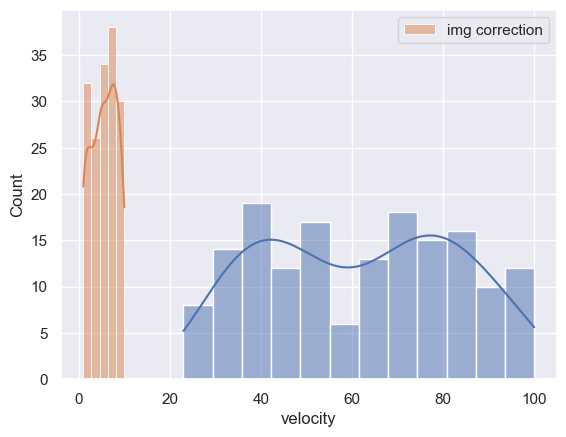

In [61]:
sns.histplot(df['velocity'], bins=int(math.sqrt(len(df['velocity']))), kde=True)
sns.histplot(df['img'], bins=5, kde=True,label = 'img correction')
plt.legend()
plt.show()

In [55]:
print("this is absolutely not a  normal distribution or any known distribution")

this is absolutely not a  normal distribution or any known distribution


In [67]:
print("we want to fit the above distribution to normal and check by goodness,z test,t .....so on of fit plot")

we want to fit the above distribution to normal and check by goodness,z test,t .....so on of fit plot


In [68]:
print(f"mean velocity will be: {np.array(df['velocity']).mean()}")

mean velocity will be: 61.75


In [76]:
print(f" population variance velocity will be: {np.array(df['velocity']).var()}")

 population variance velocity will be: 454.7375


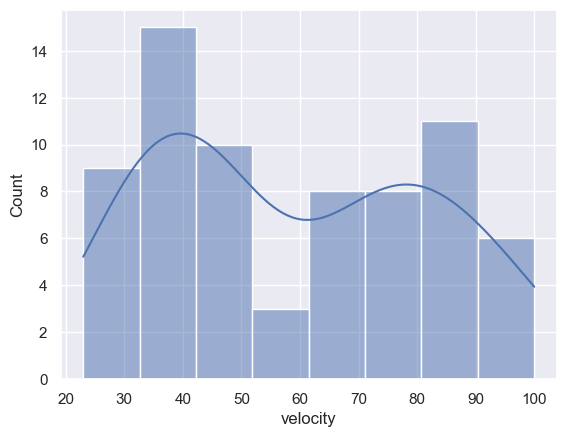

In [84]:
sampled_data = df['velocity'].sample(n=70, random_state=42)
sns.set()
sns.histplot(sampled_data, bins=int(math.sqrt(len(sampled_data))), kde=True)
plt.show()

In [85]:
print(f"sample mean velocity will be: {np.array(sampled_data).mean()}")

sample mean velocity will be: 58.97142857142857


In [86]:
cal_z_value_num = float(np.array(df['velocity']).mean()) - float(np.array(sampled_data).mean())
cal_z_value_den = float(np.array(df['velocity']).var()) / (math.sqrt(40))
cal_z_value = cal_z_value_num / cal_z_value_den
print("calculated z value will be "+str(cal_z_value))

calculated z value will be 0.03864477574756241


In [87]:
from scipy.stats import norm

# Specify the level of significance (alpha)
alpha = 0.05  #  a 95% confidence level corresponds to alpha=0.05

# Find the z-value corresponding to the specified level of significance
z_value = norm.ppf(1 - alpha/2)  # Using 1 - alpha/2 for a two-tailed test

print(f'The tabulated z-value at a {1 - alpha} confidence level is approximately {z_value:.4f}')


The tabulated z-value at a 0.95 confidence level is approximately 1.9600


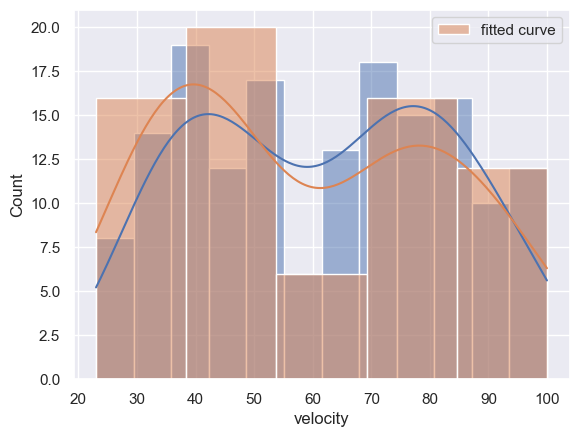

In [88]:
sns.set()
sns.histplot(df['velocity'], bins=int(math.sqrt(len(df['velocity']))), kde=True)
sns.histplot(sampled_data, bins=5, kde=True,label = 'fitted curve')
plt.legend()
plt.show()

# The curve is under fitted for smaller sample size like 40,50 but with sufficently large size ,we have our desired curve fiiting

Approach 2
# question:-  Are the Belmont Stakes results Normally distributed?

 we can also verify using ecdf and cdf graph plot 
 # efficent and more appropriate method

In [89]:
belmont_no_outliers = np.array([148.51,  146.65,  148.52,  150.7,  150.42,  150.88,  151.57,
                                147.54,  149.65,  148.74,  147.86,  148.75,  147.5,  148.26,
                                149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
                                152.02,  146.82,  149.97,  146.13,  148.1,  147.2,  146.,
                                146.4,  148.2,  149.8,  147.,  147.2,  147.8,  148.2,
                                149.,  149.8,  148.6,  146.8,  149.6,  149.,  148.2,
                                149.2,  148.,  150.4,  148.8,  147.2,  148.8,  149.6,
                                148.4,  148.4,  150.2,  148.8,  149.2,  149.2,  148.4,
                                150.2,  146.6,  149.8,  149.,  150.8,  148.6,  150.2,
                                149.,  148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
                                152.2,  148.2,  149.2,  151.,  149.6,  149.6,  149.4,
                                148.6,  150.,  150.6,  149.2,  152.6,  152.8,  149.6,
                                151.6,  152.8,  153.2,  152.4,  152.2])

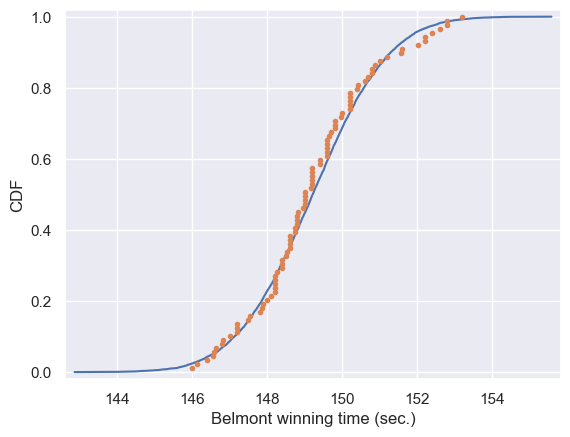

In [99]:
def ecdf(belmont_no_outliers):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(belmont_no_outliers)

    # x-data for the ECDF: x
    x = np.sort(belmont_no_outliers)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Seed random number generator
np.random.seed(42)

#mean and std deviation
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

#taking sample
sample = np.random.normal(mu,sigma,10000)

#get cdf of sample
x_th, y_th = ecdf(sample)
x, y = ecdf(belmont_no_outliers)

#plot cdf
_ = plt.plot(x_th, y_th)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

In [100]:
#What are the chances of a horse matching or beating Secretariat's record?

In [101]:
# Compute the fraction that are faster than 144 seconds: prob
prob = (len(sample[sample < 144]) / len(sample))


# Print the result
print(f'Probability of besting Secretariat: {prob}')

Probability of besting Secretariat: 0.0006


# Great work! We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.